Corentin Llorca (cl3783)

# Applied Machine Learning: Homework 2 - Task 1 

In [39]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

We start by loading the data. We make sure to only treat missing values as NaN. Moreover, we also have to "force" some categorical features to be treated as such - some of them are treated as continuous because they contain numbers. Please note that the features listed as "discrete" by the description are kept as non-categorical features here: we only force those listed as "nominal" and "ordinal".

In [32]:
#A list of the variables we want to "enforce" as categorical
cat = ['PID', 'MS SubClass', 'Overall Qual', 'Overall Cond']
catd = {}
for e in cat: 
    catd[e]='object'

df = pd.read_excel("data/task1.xls", dtype=catd,
                   na_values=[''], keep_default_na=False)

The columns 'Overall Qual' and 'Overall Cond' actually pose a real problem. They are categorical, but ordered (ordinal), so keeping them as integers instead of objects would actually make sense, because we'd at least keep the order. Here, we completely lose it. However, we gain consistency in regards to other "ratings" columns such as 'Exter Qual' and 'Exter Cond' which are treated as unordered categoricals by pandas anyway. What we would really need to do is to take all the ordinal features and tell pandas the order for each one of them, but that would be too time-consuming. 

We also drop the "order" column, because we don't want it to have an influence in predictions. The pandas dataframe is already automatically indexed, so the column serves no purpose.

In [34]:
df = df.drop(columns='Order')

## 1.1

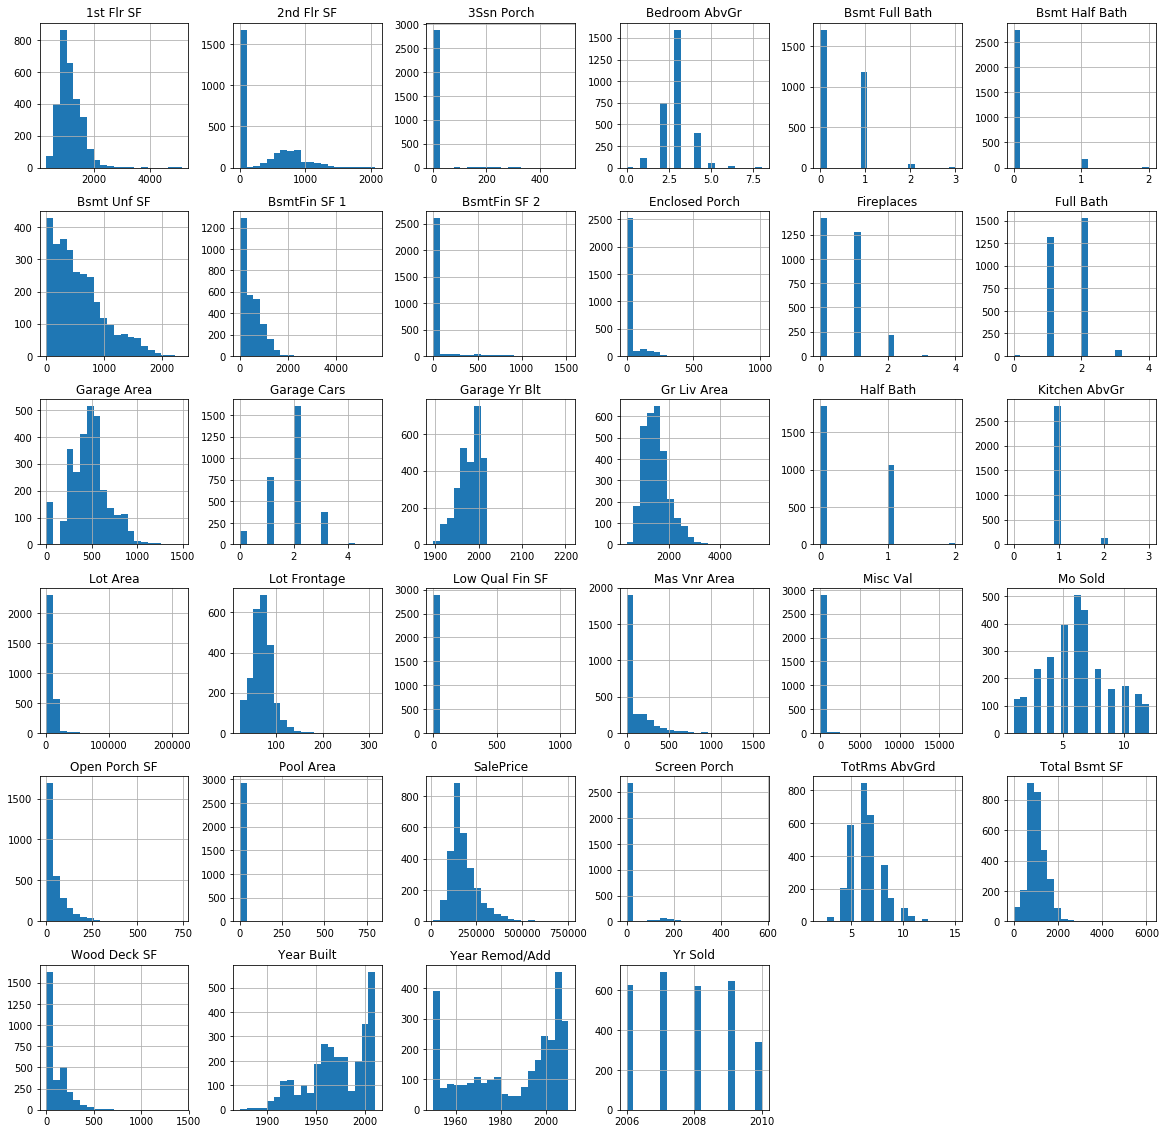

In [56]:
_ = df.hist(figsize = (20, 20), bins=20)

We notice that some histograms clearly show discrete variables, which we were expecting since we kept those as categorical when importing the data. More importantly, we can see that a lot of variables have a very high concentration of values near zero, which either indicates that there are some outliers that are "squeezing" the representation of the data into a single bin near zero, or that some missing data values are actually imputed as zero instead of missing or NaN. In both cases (outliers and data inputed as 0), the data requires special treatment.